# IRIS데이터_클러스터링

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [14]:
iris=load_iris()
iris_frame=pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris["feature_names"]+["target"])
# np.c_[[],[]](두개의 컬럼을 세로로 붙이기)
# columns --> 각 열들의 이름을 지정.
# df[""].map({}): mapping 하겠다는 말!
iris_frame["target"]=iris_frame["target"].map({1:"versicolor",0:"setosa",2:"virginica"})
x=iris_frame.iloc[:,:-1] #뒤에서 첫번째 열을 제외한 모든 열들
y=iris_frame.iloc[:,[-1]]# 뒤에서 첫번째 열만 지정. 보통 종속변수는 마지막 열에 위치해있기 때문에 가능
iris_frame


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
df1=iris_frame[["sepal length (cm)","sepal width (cm)"]]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 생성 및 예측
model=KMeans(n_clusters=3,algorithm="auto")
# 군집 개수(k) 정하기, 사실 k의 개수가 많아지면 많아질수록 
# centroid와 data간의 거리가 짧아지므로 정확도는 증가한다.
# kmeans는 종류를 알 수 없는 비지도 학습에서만 사용.
# 여기서는 test용으로
model.fit(df1)
predict=pd.DataFrame(model.predict(df1))
predict.columns=["predict"]

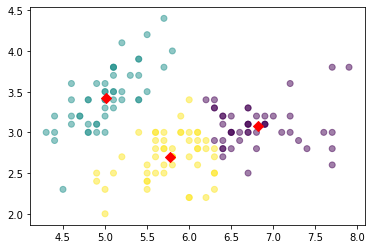

In [16]:
r = pd.concat([df1,predict],axis=1)
plt.scatter(r["sepal length (cm)"] , 
            r["sepal width (cm)" ], 
            c=r['predict'],
                alpha=0.5)
# centroid 표현
centers = pd.DataFrame(model.cluster_centers_,
                       columns = ["sepal length (cm)" , "sepal width (cm)" ])

center_x = centers["sepal length (cm)"]
center_y = centers["sepal width (cm)"]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

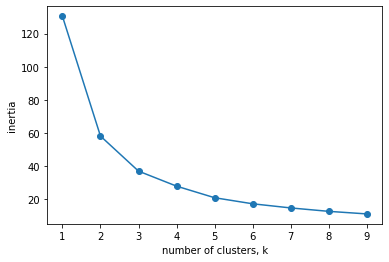

In [17]:
ks=range(1,10)
iner=[]
# 오차 제곱의 합이 얼마나 더 큰지를 비교하여 모뎔의 성능을 비교
# inertia: sse, 오차 제곱합. 즉 군집의 수가 많아질수록 오차제곱합이 줄어든다는 것을 그래프로 표현
# 군집의 수가 지나치게 많아지면 과적합이 일어날 가능성이 높아진다.
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df1)
    iner.append(model.inertia_)
plt.plot(ks,iner,"-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

# Digit 데이터_클러스터링

In [18]:
digits=load_digits()
n_image = 20

np.random.seed(0)

idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]
plt.figure(figsize= (12,1))

for i in range(n_image):
    plt.subplot(1, n_image, i+1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

NameError: name 'load_digits' is not defined